<a href="https://colab.research.google.com/github/ammarff/project-based-german-credit/blob/main/project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Based - Pembelajaran Mesin

Anggota:

1. Dzaky Audizha Patarai - 1301204195
2. Vidya Haikal Imad Fadly -1301204253
3. Muhammad Ammar Fathin - 1301201053
4. Mohamad Zulistiyan - 1301204037

# Reading the data into python

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/ammarff/project-based-german-credit/main/dataset/german_credit.csv', sep=';')
print('Shape before deleting duplicate values:', df.shape)

# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df.head(10)

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good
5,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,...,unknown / no property,48,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
6,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,male : married/widowed,none,...,unknown / no property,39,none,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good
7,no checking account,6,all credits at this bank paid back duly,others,1361,unknown/no savings account,< 1 yr,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,40,none,rent,1,unskilled - resident,3 or more,no,yes,good
8,... >= 200 DM / salary for at least 1 year,18,all credits at this bank paid back duly,furniture/equipment,1098,unknown/no savings account,unemployed,< 20,female : non-single or male : single,none,...,building soc. savings agr./life insurance,65,none,rent,03-Feb,unemployed/unskilled - non-resident,0 to 2,no,no,good
9,... < 0 DM,24,no credits taken/all credits paid back duly,furniture/equipment,3758,100 <= ... < 500 DM,unemployed,>= 35,female : non-single or male : single,none,...,real estate,23,none,for free,1,unemployed/unskilled - non-resident,0 to 2,no,no,good


In [51]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [52]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000,1000.000000,1000,1000,1000.00000,1000,1000,1000,1000,1000,...,1000,1000.00000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,4,4,3,...,4,NaN,3,3,4,4,2,2,2,2
top,... >= 200 DM / salary for at least 1 year,NaN,no credits taken/all credits paid back duly,furniture/equipment,NaN,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,building soc. savings agr./life insurance,NaN,none,rent,1,skilled employee/official,0 to 2,no,no,good
freq,394,NaN,530,280,NaN,603,339,476,548,907,...,332,NaN,814,714,633,630,845,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.24800,NaN,NaN,NaN,NaN,NaN,...,NaN,35.54200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.75176,NaN,NaN,NaN,NaN,NaN,...,NaN,11.35267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.50000,NaN,NaN,NaN,NaN,NaN,...,NaN,27.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.50000,NaN,NaN,NaN,NaN,NaN,...,NaN,33.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.25000,NaN,NaN,NaN,NaN,NaN,...,NaN,42.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [54]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
status : ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
credit_history : ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
purpose : ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
savings : ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']
employment_duration : ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
installment_rate : ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
personal_status_sex : ['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']
other_debtors : ['none' 'guarantor' 'co-

In [55]:
# # Treating the Ordinal variable first
# df['status'].replace({'... < 0 DM':'A11', '0<= ... < 200 DM':'A12','... >= 200 DM / salary for at least 1 year':'A13', 'no checking account':'A14'}, inplace=True)

In [56]:
# df['credit_risk'].replace({'good':1, 'bad':0}, inplace=True)

In [57]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good


# Defining the problem statement:

Create a Predictive model which can tell weather to approve a loan application or not?
* Target Variable: GoodCredit
* Predictors: duration, history, purpose, amount, savings etc.
* credit_risk=1 means the loan was a good decision.
* credit_risk=0 means the loan was a bad decision.

Determining the type of Machine Learning
* Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.


# Exploratory Data

* Categorical variables: Bar plot
* Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seventeen categorical predictors in the data

Categorical Predictors: 'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign'

We use bar charts to see how the data is distributed for these categorical columns.

Since there are so many categorical predictors! We will call below function for 5 at a time.

In [58]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

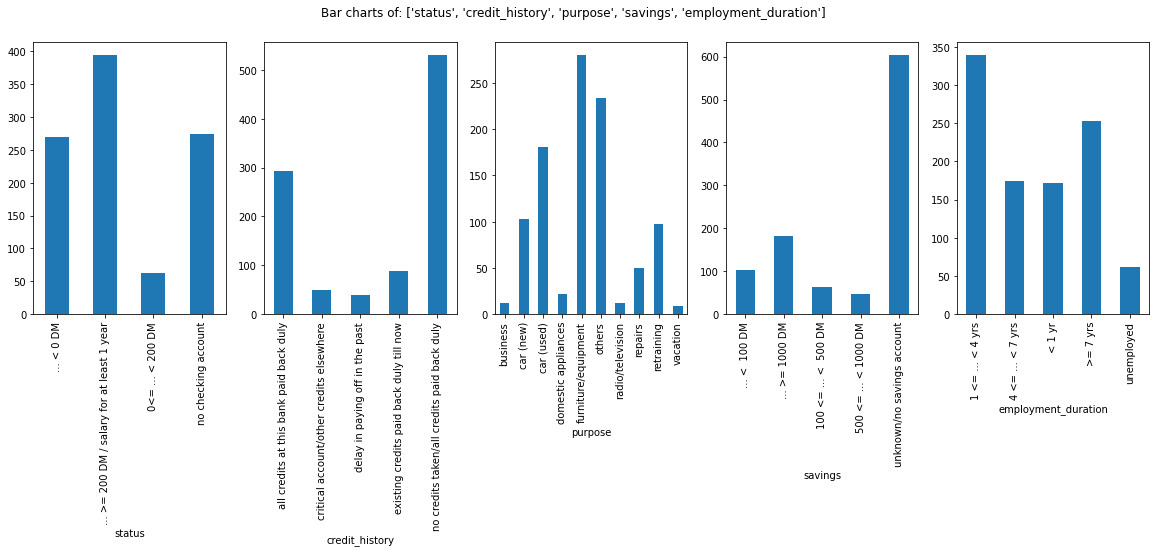

In [59]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['status', 'credit_history', 'purpose','savings','employment_duration'])

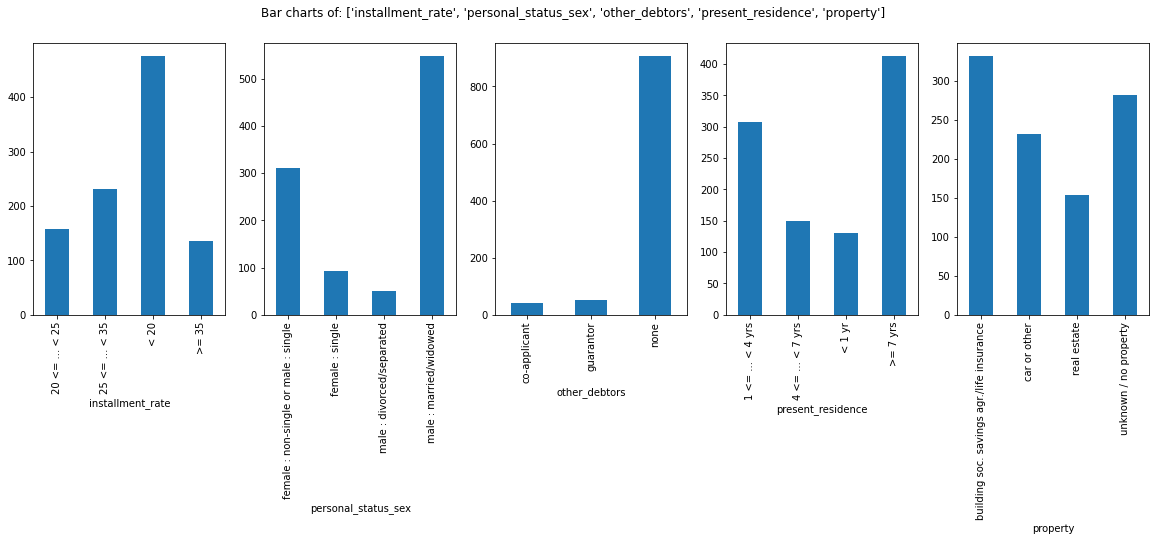

In [60]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['installment_rate', 'personal_status_sex', 'other_debtors','present_residence', 'property'])

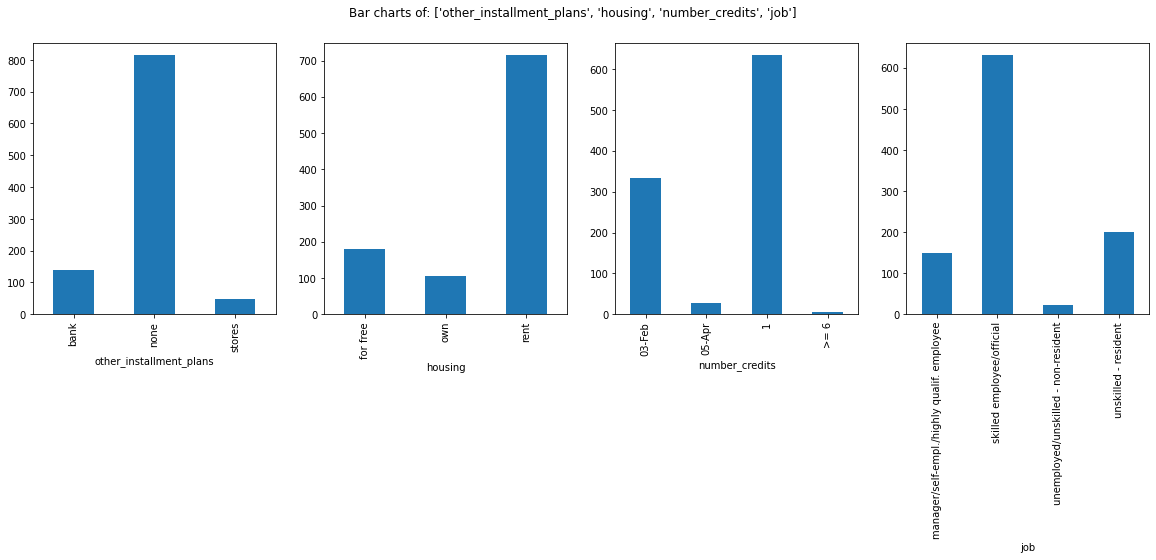

In [61]:
#####################################################################
# Calling the function for 4 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['other_installment_plans', 'housing', 'number_credits', 'job'])

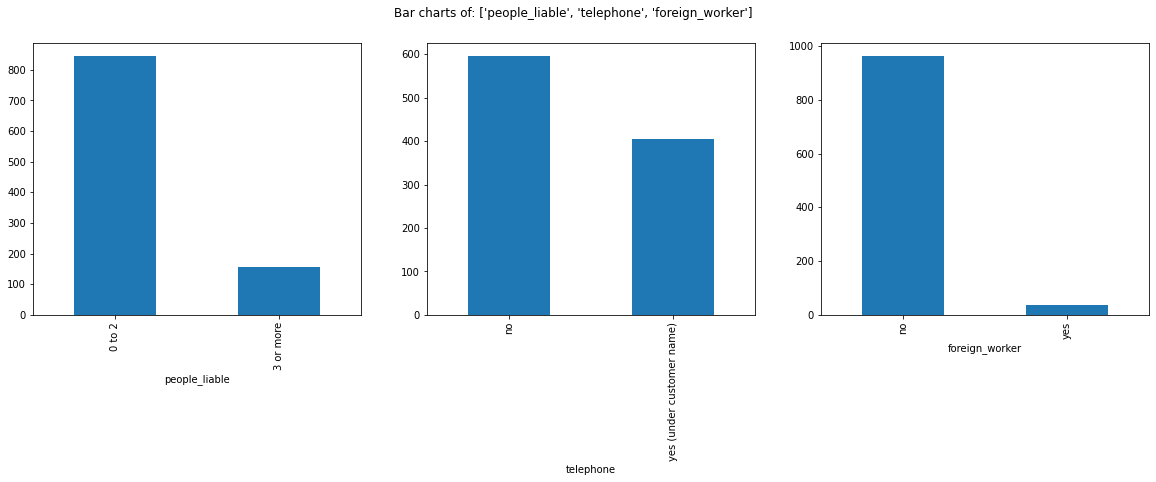

In [62]:
#####################################################################
# Calling the function for 3 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['people_liable', 'telephone', 'foreign_worker'])

## Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "property" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "foreign" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "foreign" and "others" have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected with a doubt on "foreign" and "others".

'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign'

=======================================================================================

## Visualize distribution of all the Continuous Predictor variables in the data using histograms


Based on the Basic Data Exploration, There are Three continuous predictor variables 'duration', 'amount',and 'age'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6cf95a550>,
      dtype=object)

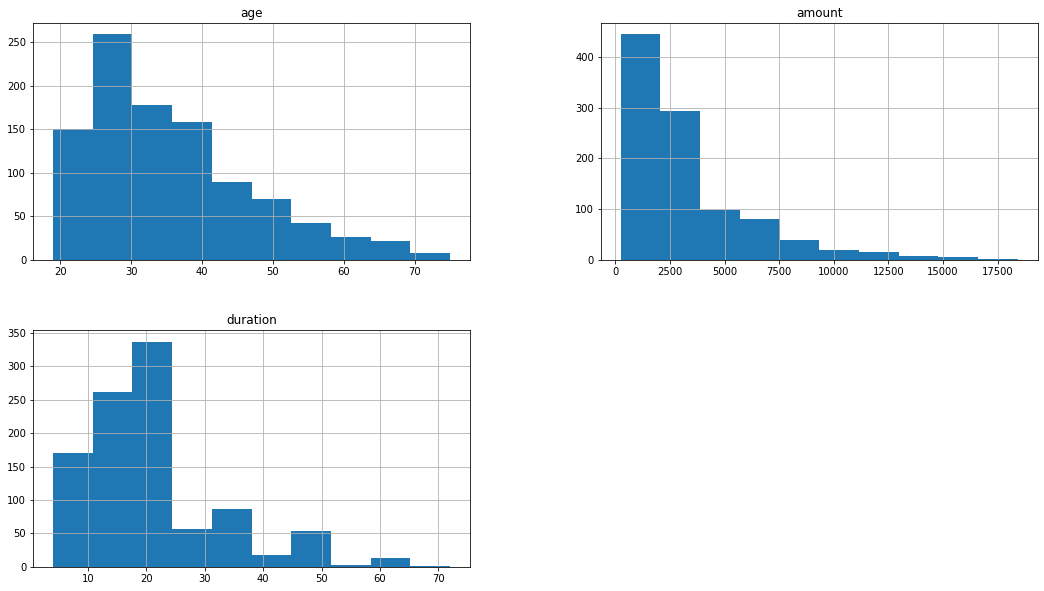

In [63]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
df.hist(['age', 'amount','duration'], figsize=(18,10))

## Histogram Interpretation


Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 260 rows in data that has age between 25 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* age: Selected. Slightly skewed distribution, acceptable.
* amount: Selected. Slightly skewed distribution, acceptable.
* duration: Selected. Slightly skewed distribution, acceptable.

## Outliers Treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.

## Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [64]:
# Finding how many missing values are there for each column
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

# Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test


In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

## Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

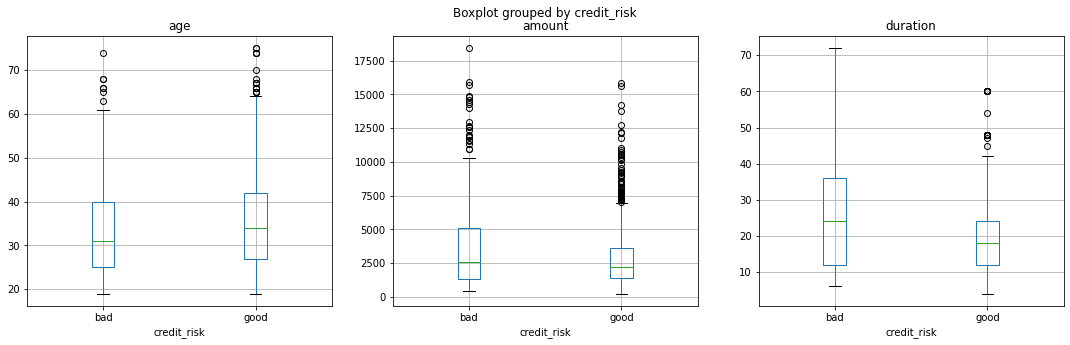

In [65]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='credit_risk', figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [67]:
#Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [68]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=df, TargetVariable='credit_risk', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with credit_risk | P-Value: 0.003868455281308189
amount is correlated with credit_risk | P-Value: 8.795399017206301e-07
duration is correlated with credit_risk | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

The results of ANOVA confirm our visual analysis using box plots above!

Notice the P-Value of "age", it is just at the boundry of the threshold. This is something we already doubted in the box plots section already.

While the other two P-Values are clearly zero, hence they are correlated without doubt.

All three columns are correlated with credit_risk.

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [69]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=df['status'], columns=df['credit_risk'])
CrossTabResult

credit_risk,bad,good
status,,
... < 0 DM,105,164
... >= 200 DM / salary for at least 1 year,46,348
0<= ... < 200 DM,14,49
no checking account,135,139


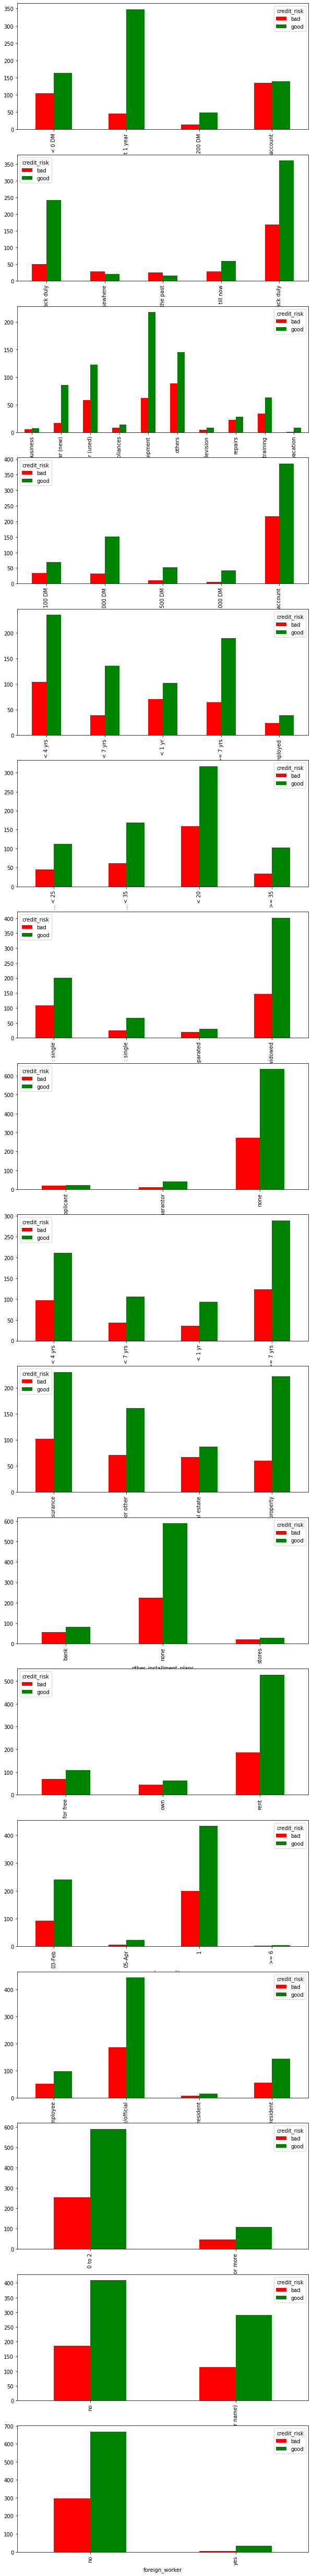

In [72]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['status', 'credit_history', 'purpose','savings','employment_duration',
                     'installment_rate', 'personal_status_sex', 'other_debtors','present_residence', 'property',
                     'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['credit_risk'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

## Grouped Bar charts Interpretation

hese grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the "tele" Vs "GoodCredit" plot. The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.

On the other hand, look at the "history" vs "GoodCredit" plot. The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [73]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [74]:
CategoricalVariables=['status', 'credit_history', 'purpose','savings','employment_duration',
                     'installment_rate', 'personal_status_sex', 'other_debtors','present_residence', 'property',
                     'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='credit_risk',
              CategoricalVariablesList= CategoricalVariables)

status is correlated with credit_risk | P-Value: 1.2189020722893755e-26
credit_history is correlated with credit_risk | P-Value: 1.2791872956750918e-12
purpose is correlated with credit_risk | P-Value: 0.00011574910079691586
savings is correlated with credit_risk | P-Value: 2.7612142385682596e-07
employment_duration is correlated with credit_risk | P-Value: 0.0010454523491402522
installment_rate is NOT correlated with credit_risk | P-Value: 0.1400333122128481
personal_status_sex is correlated with credit_risk | P-Value: 0.02223800546926877
other_debtors is correlated with credit_risk | P-Value: 0.036055954027247206
present_residence is NOT correlated with credit_risk | P-Value: 0.8615521320413175
property is correlated with credit_risk | P-Value: 2.8584415733250017e-05
other_installment_plans is correlated with credit_risk | P-Value: 0.0016293178186473534
housing is correlated with credit_risk | P-Value: 8.810311250241031e-05
number_credits is NOT correlated with credit_risk | P-Value:

['status',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'foreign_worker']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign'

## Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [75]:
SelectedColumns=['status', 'credit_history', 'purpose','savings','employment_duration',
                      'personal_status_sex', 'other_debtors', 'property',
                     'other_installment_plans', 'housing','foreign_worker', 'age','amount', 'duration']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,foreign_worker,age,amount,duration
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,female : non-single or male : single,none,car or other,none,for free,no,21,1049,18
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,male : married/widowed,none,unknown / no property,none,for free,no,36,2799,9
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,female : non-single or male : single,none,unknown / no property,none,for free,no,23,841,12
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,male : married/widowed,none,unknown / no property,none,for free,yes,39,2122,12
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,male : married/widowed,none,car or other,bank,rent,yes,38,2171,12


In [76]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-Processing